In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import datetime, os
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.catalog import Metadata

In [2]:
cfg = get_cfg()
cfg.merge_from_file("detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("cars_train",)
cfg.MODEL.WEIGHTS = os.path.join("output/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

In [3]:
car_train_metadata = Metadata()
car_train_metadata.set(evaluator_type = 'coco')
car_train_metadata.set(thing_dataset_id_to_contiguous_id = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4})
car_train_metadata.set(thing_classes = ["road", "lane markings", "undrivable","movable","my car"])

namespace(evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
          thing_classes=['road',
                         'lane markings',
                         'undrivable',
                         'movable',
                         'my car'])

/home/adrien/Desktop/AI-SandBox/detectron2_repo/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


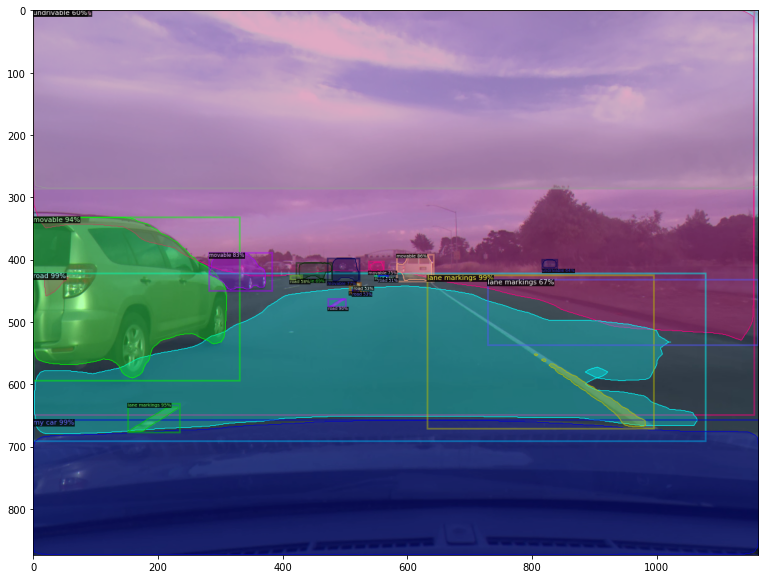

In [4]:
from detectron2.utils.visualizer import ColorMode

#for d in random.sample(dataset_dicts, 5):    
im = cv2.imread("testimg2.png")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
               metadata=car_train_metadata, 
               scale=1, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (13,13))
plt.imshow(v.get_image())